In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tcr
%matplotlib inline

In [292]:
dating_clean = pd.read_csv('/home/amybirdee/hobby_projects/dating_site/dating_clean.csv', delimiter = ',')

In [293]:
dating_clean.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75,-1,transportation,"south san francisco, california","doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,white,70,80000,hospitality / travel,"oakland, california","doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,no response given,graduated from masters program,no response given,68,-1,no response given,"san francisco, california",no response given,straight,has cats,no response given,m,pisces but it doesn't matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,no response given,working on college/university,white,71,20000,student,"berkeley, california",doesn't want kids,straight,likes cats,no response given,m,pisces,no,"english, german (poorly)",single
4,29,athletic,no response given,socially,never,graduated from college/university,"asian, black, other",66,-1,artistic / musical / writer,"san francisco, california",no response given,straight,likes dogs and likes cats,no response given,m,aquarius,no,english,single


In [294]:
#viewing column names
dating_clean.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity',
       'height', 'income', 'job', 'location', 'offspring', 'orientation',
       'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [295]:
#grouping by body type - majority are average body type
body = dating_clean.groupby('body_type').size().sort_values(ascending = False).to_frame().reset_index().rename(columns = \
                                                                                                    {0: 'body_type_count'})
body

,body_type,body_type_count
0,average,19951
1,fit,12711
2,athletic,11819
3,thin,4711
4,curvy,3924
5,a little extra,2629
6,skinny,1777
7,full figured,1009
8,overweight,444
9,jacked,421


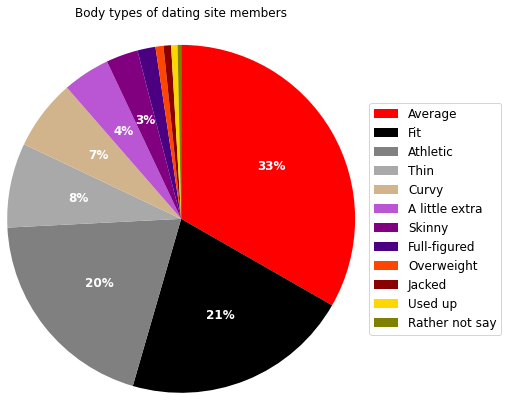

In [296]:
#putting data in a pie chart

#don't want all percentages shown on pie as it's too cluttered - this function will avoid this - will exclude percentages
#below 2%

def my_autopct(pct):
    return ('%.0f%%' % pct) if pct > 2 else ''

body_type = ['Average', 'Fit', 'Athletic', 'Thin', 'Curvy', 'A little extra', 'Skinny', 'Full-figured', 'Overweight', 
            'Jacked', 'Used up', 'Rather not say']

colors = ['red', 'black', 'grey','darkgrey', 'tan', 'mediumorchid', 'purple', 'indigo', 'orangered', 'darkred', \
          'gold', 'olive']

plt.pie(body['body_type_count'], colors = colors, radius = 2.0, autopct = my_autopct, \
                          counterclock = False, startangle = -270, \
                        textprops = {'color': 'white', 'weight': 'bold', 'fontsize': 12})

#bbox_to_anchor moves the legend around depending on the numbers fed in
plt.legend(labels = body_type, bbox_to_anchor = (2, 0.5), loc = 'right', fontsize = 12)

#the y = 1.3 shifts the title up above the chart 
plt.title('Body types of dating site members', y = 1.4, fontsize = 12)
#adding bbox_inches = 'tight' as part of the saved chart wascut off without it 
plt.savefig('body_types', bbox_inches = 'tight')

In [297]:
#grouping by diet
diet = dating_clean.groupby('diet').size().sort_values(ascending = False).to_frame().reset_index().rename(columns = \
                                                                                                    {0: 'diet_count'})
diet.head()

,diet,diet_count
0,no response given,24398
1,mostly anything,16585
2,anything,6183
3,strictly anything,5113
4,mostly vegetarian,3444


In [298]:
#diet dataframe has lots of similar diets - creating an extra column to group some of these using a dictionary method
diet_dictionary = {'no response given': 'No response',
                  'mostly anything': 'Anything',
                  'anything': 'Anything',
                  'strictly anything': 'Anything',
                  'mostly vegetarian': 'Vegetarian',
                  'mostly other': 'Other',
                  'strictly vegetarian': 'Vegetarian',
                  'vegetarian': 'Vegetarian',
                  'strictly other': 'Other',
                   'mostly vegan': 'Vegan',
                   'other': 'Other',
                  'strictly vegan': 'Vegan',
                  'vegan': 'Vegan',
                  'mostly kosher': 'Kosher',
                  'mostly halal': 'Halal',
                  'strictly kosher': 'Kosher',
                  'strictly halal': 'Halal',
                  'kosher': 'Kosher',
                  'halal': 'Halal'}

diet['diet_group'] = diet['diet'].map(diet_dictionary)
diet.head()

,diet,diet_count,diet_group
0,no response given,24398,No response
1,mostly anything,16585,Anything
2,anything,6183,Anything
3,strictly anything,5113,Anything
4,mostly vegetarian,3444,Vegetarian


In [299]:
#grouping by the new diet column
diet_group = diet.groupby('diet_group').diet_count.sum().sort_values(ascending = False).to_frame().reset_index()
diet_group

,diet_group,diet_count
0,Anything,27881
1,No response,24398
2,Vegetarian,4986
3,Other,1790
4,Vegan,702
5,Kosher,115
6,Halal,77


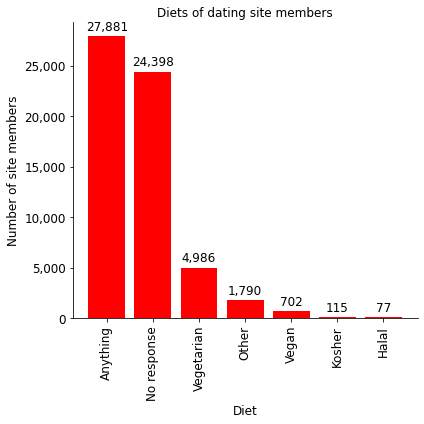

In [300]:
#plotting diet on a bar chart
plt.figure(figsize = (6, 6))
ax = plt.subplot()

plt.bar(diet_group['diet_group'], diet_group['diet_count'], color = 'red')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#adding data labels for bars
bars = plt.bar(diet_group['diet_group'], diet_group['diet_count'], color = 'red')

for bar in bars:
    yval = bar.get_height()
    #the '{:,}' command adds a thousand separator to the labels
    ax.annotate('{:,}'.format(yval),
    xy = (bar.get_x() + bar.get_width() / 2, yval),
    #shows label position on x and y axis
    xytext = (0, 3), 
    textcoords = 'offset points', ha = 'center', va = 'bottom', fontsize = 12)
    
#function to add comma separator to labels
def comma(x, pos): 
    return format(x, ",.0f")

#this code adds a comma separater to the y tick marks
ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))

plt.xticks(rotation = 90)
plt.xlabel('Diet', fontsize = 12)
plt.ylabel('Number of site members', fontsize = 12)
plt.title('Diets of dating site members', fontsize = 12)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)

plt.tight_layout()
plt.savefig('Diet')

In [301]:
#grouping by drinks column
drinks = dating_clean.groupby('drinks').size().sort_values(ascending = False).to_frame().reset_index().rename(columns = \
                                                                                                {0: 'count_of_drinks'})
drinks

,drinks,count_of_drinks
0,socially,41780
1,rarely,5957
2,often,5164
3,not at all,3267
4,no response given,2988
5,very often,471
6,desperately,322


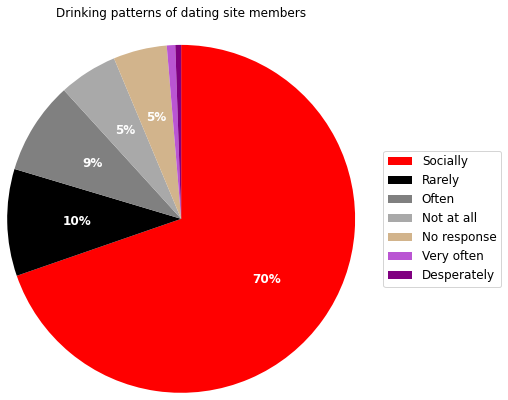

In [302]:
#creating a pie chart - high proportion are social drinkers

def my_autopct(pct):
    return ('%.0f%%' % pct) if pct > 1 else ''

drinks_labels = ['Socially', 'Rarely', 'Often', 'Not at all', 'No response', 'Very often', 'Desperately']

colors = ['red', 'black', 'grey','darkgrey', 'tan', 'mediumorchid', 'purple']

plt.pie(drinks['count_of_drinks'], colors = colors, radius = 2.0, \
                autopct = my_autopct, counterclock = False, startangle = -270, \
                textprops = {'color': 'white', 'weight': 'bold', 'fontsize': 12})

#bbox_to_anchor moves the legend around depending on the numbers fed in
plt.legend(labels = drinks_labels, bbox_to_anchor = (2, 0.5), loc = 'right', fontsize = 12)


#the y = 1.4 shifts the title up above the chart 
plt.title('Drinking patterns of dating site members', y = 1.4, fontsize = 12)
plt.savefig('drinking_patterns', bbox_inches = 'tight')

In [303]:
#grouping drugs data
drugs = dating_clean.groupby('drugs').size().sort_values(ascending = False).to_frame().reset_index().rename(columns = \
                                                                                                    {0: 'count_of_drugs'})
drugs

,drugs,count_of_drugs
0,never,37724
1,no response given,14083
2,sometimes,7732
3,often,410


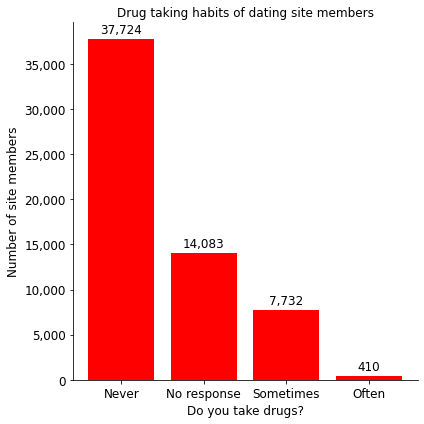

In [304]:
#plotting on bar chart
labels = ['Never', 'No response', 'Sometimes', 'Often']

plt.figure(figsize = (6, 6))
ax = plt.subplot()

plt.bar(drugs['drugs'], drugs['count_of_drugs'], color = 'red')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#adding data labels for bars
bars = plt.bar(drugs['drugs'], drugs['count_of_drugs'], color = 'red')

for bar in bars:
    yval = bar.get_height()
    #the '{:,}' command adds a thousand separator to the labels
    ax.annotate('{:,}'.format(yval),
    xy = (bar.get_x() + bar.get_width() / 2, yval),
    #shows label position on x and y axis
    xytext = (0, 3), 
    textcoords = 'offset points', ha = 'center', va = 'bottom', fontsize = 12)

#this code adds a comma separater to the y tick marks
ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))


plt.xticks(drugs['drugs'], labels, fontsize = 12)
plt.xlabel('Do you take drugs?', fontsize = 12)
plt.ylabel('Number of site members', fontsize = 12)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.title('Drug taking habits of dating site members', fontsize = 12)
plt.tight_layout()
plt.savefig('Drugs')

In [305]:
#grouping by education
education = dating_clean.groupby('education').size().sort_values(ascending = False).to_frame().reset_index().rename(columns\
                                                                                                    = {0: 'education_count'})
education.head()

,education,education_count
0,graduated from college/university,23959
1,graduated from masters program,8961
2,no response given,6631
3,working on college/university,5712
4,working on masters program,1683


In [306]:
#education dataframe has lots of similar educations - creating an extra column to group some of these using a dictionary 
#method
education_dictionary = {'graduated from college/university': 'Graduated - higher education',
                       'graduated from masters program': 'Graduated - higher education',
                       'no response given': 'No response',
                       'working on college/university': 'Studying - higher education',
                       'working on masters program': 'Studying - higher education',
                       'graduated from two-year college': 'Graduated - lower education',
                       'graduated from high school': 'Graduated - lower education',
                       'graduated from ph.d program': 'Graduated - higher education',
                       'graduated from law school': 'Graduated - higher education',
                       'working on two-year college': 'Studying - lower education',
                       'dropped out of college/university': 'Dropped out',
                       'working on ph.d program': 'Studying - higher education',
                       'college/university': 'Studying - higher education',
                       'graduated from space camp': 'Graduated - higher education',
                       'dropped out of space camp': 'Dropped out',
                       'graduated from med school': 'Graduated - higher education',
                       'working on space camp': 'Studying - higher education',
                       'working on law school': 'Studying - higher education',
                       'two-year college': 'Studying - lower education',
                       'working on med school': 'Studying - higher education',
                       'dropped out of two-year college': 'Dropped out',
                       'dropped out of masters program': 'Dropped out',
                       'masters program': 'Studying - higher education',
                       'dropped out of ph.d program': 'Dropped out',
                       'dropped out of high school': 'Dropped out',
                       'high school': 'Studying - lower education',
                       'working on high school': 'Studying - lower education',
                       'space camp': 'Studying - higher education',
                       'ph.d program': 'Studying - higher education',
                       'law school': 'Studying - higher education',
                       'dropped out of law school': 'Dropped out',
                       'dropped out of med school': 'Dropped out',
                       'med school': 'Studying - higher education'}

education['education_group'] = education['education'].map(education_dictionary)
education.head()

,education,education_count,education_group
0,graduated from college/university,23959,Graduated - higher education
1,graduated from masters program,8961,Graduated - higher education
2,no response given,6631,No response
3,working on college/university,5712,Studying - higher education
4,working on masters program,1683,Studying - higher education


In [307]:
#grouping by new column in education table
education_grouped = education.groupby('education_group').education_count.sum().sort_values().to_frame().reset_index()
education_grouped

,education_group,education_count
0,Studying - lower education,1479
1,Dropped out,2108
2,Graduated - lower education,2959
3,No response,6631
4,Studying - higher education,10355
5,Graduated - higher education,36417


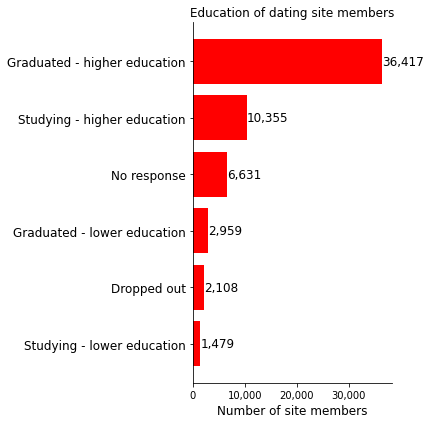

In [308]:
#plotting on a bar chart - many of the sites's members are highly educated
plt.figure(figsize = (6, 6))
ax = plt.subplot()

plt.barh(education_grouped['education_group'], education_grouped['education_count'], color = 'red')

#removing top and right border
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#adding data labels
bars = plt.barh(education_grouped['education_group'], education_grouped['education_count'], color = 'red')

for bar in bars:
    x_val = bar.get_width()
    y_val = bar.get_y() + bar.get_height() / 2
    label = '{:,}'.format(x_val)
    plt.annotate(label, (x_val, y_val), ha = 'left', va = 'center', fontsize = 12)

    
#function to add comma separator to labels
def comma(y, pos): 
    return format(y, ",.0f")

#this code adds a comma separater to the y tick marks
ax.xaxis.set_major_formatter(tcr.FuncFormatter(comma))

plt.xlabel('Number of site members', fontsize = 12)
plt.ylabel('')
plt.tick_params(axis = 'y', labelsize = 12)
plt.title('Education of dating site members', fontsize = 12)
plt.tight_layout()
plt.savefig('Education')

In [309]:
#is there a link between those who dropped out of education and their drink/drugs taking? Filtering the main dataframe to
#find out
dropped_out = dating_clean[dating_clean['education'].str.contains('dropped')]
dropped_out.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
48,31,thin,strictly anything,socially,sometimes,dropped out of space camp,no response given,67,1000000,artistic / musical / writer,"san francisco, california",doesn't have kids,bisexual,no response given,no response given,f,no response given,no,"english (fluently), belarusan, gujarati, lisp,...",single
96,34,skinny,mostly other,very often,no response given,dropped out of space camp,white,75,-1,hospitality / travel,"san francisco, california",no response given,straight,likes dogs and has cats,other and very serious about it,m,aries,no,"english (poorly), german (poorly), spanish (po...",single
117,55,athletic,no response given,not at all,never,dropped out of college/university,white,67,-1,construction / craftsmanship,"alameda, california",has kids,straight,likes dogs and likes cats,other but not too serious about it,m,leo,no,"english (fluently), spanish (fluently), japane...",single
128,26,average,no response given,often,never,dropped out of space camp,white,71,-1,computer / hardware / software,"san francisco, california",doesn't want kids,straight,likes dogs and likes cats,atheism and laughing about it,m,libra,trying to quit,english,single
130,30,average,no response given,socially,sometimes,dropped out of college/university,white,69,-1,no response given,"san francisco, california",no response given,straight,likes cats,agnosticism,m,gemini but it doesn't matter,yes,english,available


In [310]:
#grouping by the dropped out column
dropped = dropped_out.groupby('education').size().sort_values(ascending = False).to_frame().reset_index().rename(columns \
                                                                                                    = {0: 'dropped_count'})
dropped

,education,dropped_count
0,dropped out of college/university,995
1,dropped out of space camp,523
2,dropped out of two-year college,191
3,dropped out of masters program,140
4,dropped out of ph.d program,127
5,dropped out of high school,102
6,dropped out of law school,18
7,dropped out of med school,12


In [311]:
#splitting these between dropping out of higher and lower eduction by applying a function

def set_value(row_number, assigned_value):
    return(assigned_value[row_number])

dropped_out_dict = {'dropped out of college/university': 'dropped out - higher education',
                   'dropped out of space camp': 'dropped out - higher education',
                   'dropped out of two-year college': 'dropped out - lower education',
                   'dropped out of masters program': 'dropped out - higher education',
                   'dropped out of ph.d program': 'dropped out - higher education',
                   'dropped out of high school': 'dropped out - lower education',
                   'dropped out of law school': 'dropped out - higher education',
                   'dropped out of med school': 'dropped out - higher education'}

#there is a comma after dropped_out_dict below - without this there was an error saying the function expected 2 arguments
#but 9 were given
dropped_out['dropped_group'] = dropped_out['education'].apply(set_value, args = (dropped_out_dict, ))
dropped_out.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,dropped_group
48,31,thin,strictly anything,socially,sometimes,dropped out of space camp,no response given,67,1000000,artistic / musical / writer,...,doesn't have kids,bisexual,no response given,no response given,f,no response given,no,"english (fluently), belarusan, gujarati, lisp,...",single,dropped out - higher education
96,34,skinny,mostly other,very often,no response given,dropped out of space camp,white,75,-1,hospitality / travel,...,no response given,straight,likes dogs and has cats,other and very serious about it,m,aries,no,"english (poorly), german (poorly), spanish (po...",single,dropped out - higher education
117,55,athletic,no response given,not at all,never,dropped out of college/university,white,67,-1,construction / craftsmanship,...,has kids,straight,likes dogs and likes cats,other but not too serious about it,m,leo,no,"english (fluently), spanish (fluently), japane...",single,dropped out - higher education
128,26,average,no response given,often,never,dropped out of space camp,white,71,-1,computer / hardware / software,...,doesn't want kids,straight,likes dogs and likes cats,atheism and laughing about it,m,libra,trying to quit,english,single,dropped out - higher education
130,30,average,no response given,socially,sometimes,dropped out of college/university,white,69,-1,no response given,...,no response given,straight,likes cats,agnosticism,m,gemini but it doesn't matter,yes,english,available,dropped out - higher education


In [312]:
#dropping unnecessary columns
dropped_out = dropped_out.drop(['age', 'body_type', 'diet', 'ethnicity', 'height', 'income', 'job', 'location',\
                              'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'], \
                               axis = 1).reset_index(drop = True)
dropped_out.head()

,drinks,drugs,education,dropped_group
0,socially,sometimes,dropped out of space camp,dropped out - higher education
1,very often,no response given,dropped out of space camp,dropped out - higher education
2,not at all,never,dropped out of college/university,dropped out - higher education
3,often,never,dropped out of space camp,dropped out - higher education
4,socially,sometimes,dropped out of college/university,dropped out - higher education


In [313]:
#grouping by education and drinking - higher education people who dropped out drink more
dropped_drink = dropped_out.groupby(['dropped_group', 'drinks']).dropped_group.count()
dropped_drink

dropped_group                   drinks           
dropped out - higher education  desperately            41
                                no response given      50
                                not at all            147
                                often                 264
                                rarely                246
                                socially             1027
                                very often             40
dropped out - lower education   desperately             7
                                no response given       5
                                not at all             35
                                often                  44
                                rarely                 41
                                socially              143
                                very often             18
Name: dropped_group, dtype: int64

In [314]:
#grouping by education and drugs - higher education people who dropped out do more drugs
dropped_drugs = dropped_out.groupby(['dropped_group', 'drugs']).dropped_group.count()
dropped_drugs

dropped_group                   drugs            
dropped out - higher education  never                817
                                no response given    454
                                often                 43
                                sometimes            501
dropped out - lower education   never                139
                                no response given     48
                                often                 19
                                sometimes             87
Name: dropped_group, dtype: int64

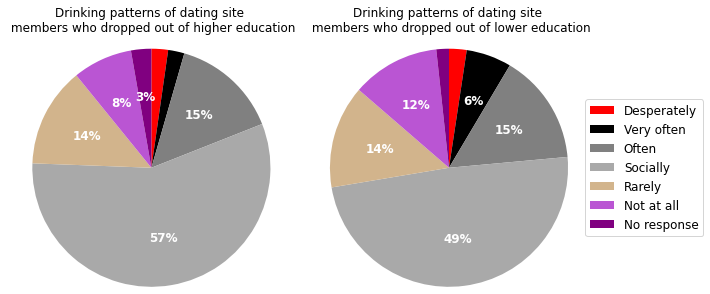

In [315]:
#creating pie charts to show the comparison
drink_labels = ['Desperately', 'Very often', 'Often', 'Socially', 'Rarely', 'Not at all', 'No response']

drinks_higher = [41, 40, 264, 1027, 246, 147, 50]
drinks_lower = [7, 18, 44, 143, 41, 35, 5] 
colors = ['red', 'black', 'grey','darkgrey', 'tan', 'mediumorchid', 'purple']

def drinks_autopct(pct):
    return ('%.0f%%' % pct) if pct > 2.5 else ''

ax = plt.subplot(1, 2, 1)
plt.pie(drinks_higher, colors = colors, radius = 8.0, autopct = drinks_autopct, \
            counterclock = False, startangle = -270, \
           textprops = {'color': 'white', 'weight': 'bold', 'fontsize': 12})
    
plt.title('Drinking patterns of dating site \n members who dropped out of higher education', y = 4.0)

ax = plt.subplot(1, 2, 2)
plt.pie(drinks_lower, colors = colors, radius = 8.0, autopct = drinks_autopct, \
                          counterclock = False, startangle = -270, \
                         textprops = {'color': 'white', 'weight': 'bold', 'fontsize': 12})

#adjusting space between pie charts
plt.subplots_adjust(wspace = 7.0)

#bbox_to_anchor moves the legend around depending on the numbers fed in
plt.legend(labels = drink_labels, bbox_to_anchor = (7.5, 0.5), loc = 'right', fontsize = 12)

plt.title('Drinking patterns of dating site \n members who dropped out of lower education', y = 4.0, fontsize = 12)
plt.savefig('drinking_patterns_by education')

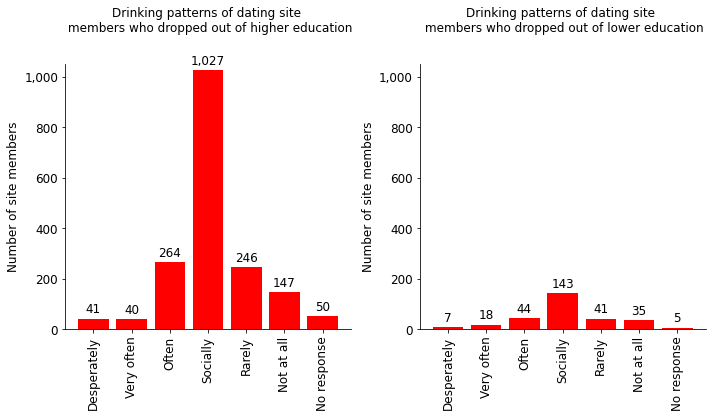

In [316]:
#pie chart hides the true numbers - trying a bar chart
drink_labels = ['Desperately', 'Very often', 'Often', 'Socially', 'Rarely', 'Not at all', 'No response']

drinks_higher = [41, 40, 264, 1027, 246, 147, 50]
drinks_lower = [7, 18, 44, 143, 41, 35, 5]

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1, 2, 1)               
plt.bar(drink_labels, drinks_higher, color = 'red')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

bars = plt.bar(drink_labels, drinks_higher, color = 'red')

for bar in bars:
    yval = bar.get_height()
    #the '{:,}' command adds a thousand separator to the labels
    ax.annotate('{:,}'.format(yval),
    xy = (bar.get_x() + bar.get_width() / 2, yval),
    #shows label position on x and y axis
    xytext = (0, 3), 
    textcoords = 'offset points', ha = 'center', va = 'bottom', fontsize = 12)
    
#function to add comma separator to labels
def comma(x, pos): 
    return format(x, ",.0f")

#this code adds a comma separater to the y tick marks
ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))


plt.xticks(drink_labels, rotation = 90, fontsize = 12)
plt.ylim(0, 1050)
plt.xlabel('')
plt.ylabel('Number of site members', fontsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.title('Drinking patterns of dating site \n members who dropped out of higher education', fontsize = 12, y = 1.1)

ax = fig.add_subplot(1, 2, 2)               
plt.bar(drink_labels, drinks_lower, color = 'red')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

bars = plt.bar(drink_labels, drinks_lower, color = 'red')

for bar in bars:
    yval = bar.get_height()
    #the '{:,}' command adds a thousand separator to the labels
    ax.annotate('{:,}'.format(yval),
    xy = (bar.get_x() + bar.get_width() / 2, yval),
    #shows label position on x and y axis
    xytext = (0, 3), 
    textcoords = 'offset points', ha = 'center', va = 'bottom', fontsize = 12)

ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))

plt.xticks(drink_labels, rotation = 90, fontsize = 12)
plt.ylim(0, 1050)
plt.xlabel('')
plt.ylabel('Number of site members', fontsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.title('Drinking patterns of dating site \n members who dropped out of lower education', fontsize = 12, y = 1.1)

plt.subplots_adjust(wspace = 0.4)
plt.tight_layout()
plt.savefig('drinking_patterns_by_education_bar_chart')

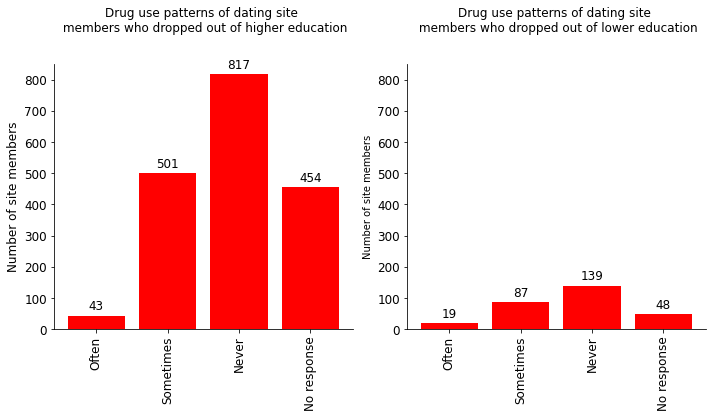

In [317]:
#creating bar charts for drug use
drug_labels = ['Often', 'Sometimes', 'Never', 'No response']

drugs_higher = [43, 501, 817, 454]
drugs_lower = [19, 87, 139, 48]

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1, 2, 1)               
plt.bar(drug_labels, drugs_higher, color = 'red')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

bars = plt.bar(drug_labels, drugs_higher, color = 'red')

for bar in bars:
    yval = bar.get_height()
    #the '{:,}' command adds a thousand separator to the labels
    ax.annotate('{:,}'.format(yval),
    xy = (bar.get_x() + bar.get_width() / 2, yval),
    #shows label position on x and y axis
    xytext = (0, 3), 
    textcoords = 'offset points', ha = 'center', va = 'bottom', fontsize = 12)
    
ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))
    
plt.xticks(drug_labels, rotation = 90, fontsize = 12)
plt.xlabel('')
plt.tick_params(axis = 'y', labelsize = 12)
plt.ylim(0, 850)
plt.ylabel('Number of site members', fontsize = 12)
plt.title('Drug use patterns of dating site \n members who dropped out of higher education', fontsize = 12, y = 1.1)

ax = fig.add_subplot(1, 2, 2)               
plt.bar(drug_labels, drugs_lower, color = 'red')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

bars = plt.bar(drug_labels, drugs_lower, color = 'red')

for bar in bars:
    yval = bar.get_height()
    #the '{:,}' command adds a thousand separator to the labels
    ax.annotate('{:,}'.format(yval),
    xy = (bar.get_x() + bar.get_width() / 2, yval),
    #shows label position on x and y axis
    xytext = (0, 3), 
    textcoords = 'offset points', ha = 'center', va = 'bottom', fontsize = 12)
    
ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))

plt.xticks(drug_labels, rotation = 90, fontsize = 12)
plt.xlabel('')
plt.tick_params(axis = 'y', labelsize = 12)
plt.ylim(0, 850)
plt.ylabel('Number of site members')
plt.title('Drug use patterns of dating site \n members who dropped out of lower education', fontsize = 12, y = 1.1)

plt.subplots_adjust(wspace = 0.4)
plt.tight_layout()
plt.savefig('drug_use_patterns_by_education')

In [318]:
#grouping by the ethnicity column - there are 217 entries. Not going to make assumptions about ethnicity by grouping them
#and this many entries isn't really feasible for a chart
ethnicity = dating_clean.groupby('ethnicity').size().sort_values(ascending = False).to_frame().reset_index().rename(columns \
                                                                                                    = {0: 'ethnicity_count'})
ethnicity.head()

,ethnicity,ethnicity_count
0,white,32828
1,asian,6134
2,no response given,5686
3,hispanic / latin,2823
4,black,2008


In [319]:
#grouping by job column
job = dating_clean.groupby('job').size().sort_values(ascending = False).to_frame().reset_index().rename(columns = \
                                                                                                        {0: 'job_count'})
job.head()

,job,job_count
0,no response given,8204
1,other,7588
2,student,4882
3,science / tech / engineering,4848
4,computer / hardware / software,4709


In [320]:
#the 'no response', 'rather not say' and 'other' categories in the job table don't tell us anything so dropping those
job = job.drop([0, 1, 17]).reset_index(drop = True)
job

,job,job_count
0,student,4882
1,science / tech / engineering,4848
2,computer / hardware / software,4709
3,artistic / musical / writer,4438
4,sales / marketing / biz dev,4391
5,medicine / health,3679
6,education / academia,3513
7,executive / management,2373
8,banking / financial / real estate,2266
9,entertainment / media,2250


In [321]:
#changing job titles to capital letters for chart
job_dictionary = {'student': 'Student',
                  'science / tech / engineering': 'Science / Tech / Engineering',
                  'computer / hardware / software': 'Computer / Hardware / Software', 
                  'artistic / musical / writer': 'Artistic / Musical / Writer',
                  'sales / marketing / biz dev': 'Sales / Marketing / Biz dev',
                  'medicine / health': 'Medicine / Health', 
                  'education / academia': 'Education, Academia',
                  'executive / management': 'Executive / Management',
                  'banking / financial / real estate': 'Banking / Financial / Real Estate',
                  'entertainment / media': 'Entertainment / Media',
                  'law / legal services': 'Law / Legal Services',
                  'hospitality / travel': 'Hospitality / Travel',
                  'construction / craftsmanship': 'Construction / Craftsmanship',
                  'clerical / administrative': 'Clerical / Administrative',
                  'political / government': 'Political / Government',
                  'transportation': 'Transportation',
                  'unemployed': 'Unemployed',
                  'retired': 'Retired',
                  'military': 'Military'}

job['job'] = job['job'].map(job_dictionary)
job.head()

,job,job_count
0,Student,4882
1,Science / Tech / Engineering,4848
2,Computer / Hardware / Software,4709
3,Artistic / Musical / Writer,4438
4,Sales / Marketing / Biz dev,4391


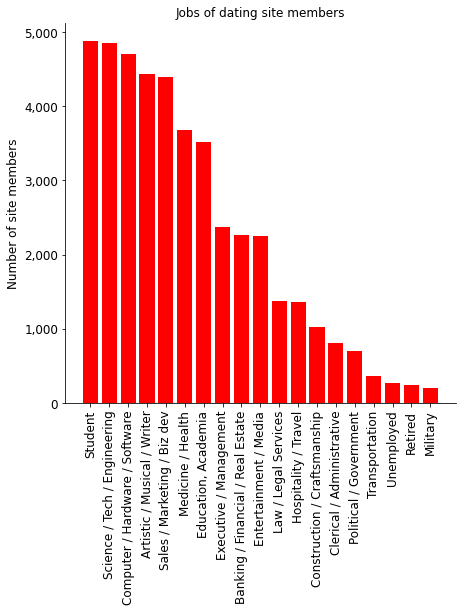

In [322]:
#plotting jobs on a bar chart
plt.figure(figsize = (7,7))
ax = plt.subplot()
plt.bar(job['job'], job['job_count'], color = 'red')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#this code adds a comma separater to the y tick marks
ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))

plt.xticks(rotation = 90)
plt.xlabel('')
plt.ylabel('Number of site members', fontsize = 12)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.title('Jobs of dating site members', fontsize = 12)
plt.savefig('Jobs', bbox_inches = 'tight')

In [323]:
#grouping by location column
location = dating_clean.groupby('location').size().sort_values(ascending = False).to_frame().reset_index().rename(columns = \
                                                                                                        {0: 'location_count'})
location.head()

,location,location_count
0,"san francisco, california",31064
1,"oakland, california",7214
2,"berkeley, california",4210
3,"san mateo, california",1331
4,"palo alto, california",1064


In [324]:
#using lambda x to replace some of these values
location['location'] = location.location.apply(lambda x: 'California' if 'california' in x else x)
location['location'] = location.location.apply(lambda x: 'Florida' if 'florida' in x else x)
location['location'] = location.location.apply(lambda x: 'New York' if 'new york' in x else x)
location['location'] = location.location.apply(lambda x: 'Massachusetts' if 'massachusetts' in x else x)
location['location'] = location.location.apply(lambda x: 'Illinois' if 'illinois' in x else x)
location['location'] = location.location.apply(lambda x: 'Georgia' if 'georgia' in x else x)
location['location'] = location.location.apply(lambda x: 'Mississippi' if 'mississippi' in x else x)
location['location'] = location.location.apply(lambda x: 'Oregon' if 'oregon' in x else x)
location['location'] = location.location.apply(lambda x: 'Michigan' if 'michigan' in x else x)
location['location'] = location.location.apply(lambda x: 'Texas' if 'texas' in x else x)
location['location'] = location.location.apply(lambda x: 'Idaho' if 'idaho' in x else x)
location['location'] = location.location.apply(lambda x: 'Minnesota' if 'minnesota' in x else x)
location['location'] = location.location.apply(lambda x: 'Washington' if 'washington' in x else x)
location['location'] = location.location.apply(lambda x: 'Virginia' if 'virginia' in x else x)
location['location'] = location.location.apply(lambda x: 'Utah' if 'utah' in x else x)
location['location'] = location.location.apply(lambda x: 'Arizona' if 'arizona' in x else x)
location['location'] = location.location.apply(lambda x: 'Tennessee' if 'tennessee' in x else x)
location['location'] = location.location.apply(lambda x: 'Montana' if 'montana' in x else x)
location['location'] = location.location.apply(lambda x: 'Ohio' if 'ohio' in x else x)
location['location'] = location.location.apply(lambda x: 'North Carolina' if 'north carolina' in x else x)
location['location'] = location.location.apply(lambda x: 'Connecticut' if 'connecticut' in x else x)
location['location'] = location.location.apply(lambda x: 'Canada' if 'canada' in x else x)
location['location'] = location.location.apply(lambda x: 'Wisconsin' if 'wisconsin' in x else x)
location['location'] = location.location.apply(lambda x: 'Spain' if 'spain' in x else x)
location['location'] = location.location.apply(lambda x: 'United Kingdom' if 'united kingdom' in x else x)
location['location'] = location.location.apply(lambda x: 'United Kingdom' if 'ireland' in x else x)
location['location'] = location.location.apply(lambda x: 'Switzerland' if 'switzerland' in x else x)
location['location'] = location.location.apply(lambda x: 'Louisiana' if 'louisiana' in x else x)
location['location'] = location.location.apply(lambda x: 'Hawaii' if 'hawaii' in x else x)
location['location'] = location.location.apply(lambda x: 'Nevada' if 'nevada' in x else x)
location['location'] = location.location.apply(lambda x: 'Mexico' if 'mexico' in x else x)
location['location'] = location.location.apply(lambda x: 'Colorado' if 'colorado' in x else x)
location['location'] = location.location.apply(lambda x: 'Netherlands' if 'netherlands' in x else x)
location['location'] = location.location.apply(lambda x: 'New Jersey' if 'new jersey' in x else x)
location['location'] = location.location.apply(lambda x: 'Rhode Island' if 'rhode island' in x else x)
location['location'] = location.location.apply(lambda x: 'Pennsylvania' if 'pennsylvania' in x else x)
location['location'] = location.location.apply(lambda x: 'Vietnam' if 'vietnam' in x else x)
location['location'] = location.location.apply(lambda x: 'Germany' if 'germany' in x else x)
location['location'] = location.location.apply(lambda x: 'Missouri' if 'missouri' in x else x)

In [325]:
#grouping the new table
location_grouped = location.groupby('location').location_count.sum().sort_values(ascending = False).to_frame().reset_index()
location_grouped.head(10)

,location,location_count
0,California,59852
1,New York,17
2,Illinois,8
3,no response given,6
4,Massachusetts,5
5,Oregon,4
6,Washington,4
7,Texas,4
8,Michigan,4
9,Florida,3


In [326]:
#will display as a tabel in presentation so sending to csv
location = location.to_csv('/home/amybirdee/hobby_projects/dating_site/location_data.csv', index = False)

In [327]:
#grouping by offspring
offspring = dating_clean.groupby('offspring').size().sort_values(ascending = False).to_frame().reset_index().rename(columns = \
                                                                                                    {0: 'offspring_count'})
offspring

,offspring,offspring_count
0,no response given,35566
1,doesn't have kids,7559
2,"doesn't have kids, but might want them",3875
3,"doesn't have kids, but wants them",3565
4,doesn't want kids,2926
5,has kids,1883
6,has a kid,1881
7,"doesn't have kids, and doesn't want any",1132
8,"has kids, but doesn't want more",442
9,"has a kid, but doesn't want more",275


In [328]:
#grouping and renaming some of the offspring data
def set_value(row_number, assigned_value):
    return(assigned_value[row_number])

offspring_dict = {'no response given': 'No response',
                 'doesn\'t have kids': 'Doesn\'t have kids',
                 'doesn\'t have kids, but might want them': 'Doesn\'t have kids but might want them',
                 'doesn\'t have kids, but wants them': 'Doesn\'t have kids but wants them',
                 'doesn\'t want kids': 'Doesn\'t want kids',
                 'has kids': 'Has kids',
                 'has a kid': 'Has kids',
                 'doesn\'t have kids, and doesn\'t want any': 'Doesn\'t have kids and doesn\'t want any',
                 'has kids, but doesn\'t want more': 'Has kids but doesn\'t want more',
                 'has a kid, but doesn\'t want more': 'Has kids but doesn\'t want more',
                 'has a kid, and might want more': 'Has kids and might want more',
                 'has kids, and might want more': 'Has kids and might want more',
                 'wants kids': 'Wants kids',
                 'might want kids': 'Might want kids',
                 'has a kid, and wants more': 'Has kids and wants more',
                 'has kids, and wants more': 'Has kids and wants more'}
                 
                

#there is a comma after dropped_out_dict below - without this there was an error saying the function expected 2 arguments
#but 9 were given
offspring['offspring_group'] = offspring['offspring'].apply(set_value, args = (offspring_dict, ))
offspring

,offspring,offspring_count,offspring_group
0,no response given,35566,No response
1,doesn't have kids,7559,Doesn't have kids
2,"doesn't have kids, but might want them",3875,Doesn't have kids but might want them
3,"doesn't have kids, but wants them",3565,Doesn't have kids but wants them
4,doesn't want kids,2926,Doesn't want kids
5,has kids,1883,Has kids
6,has a kid,1881,Has kids
7,"doesn't have kids, and doesn't want any",1132,Doesn't have kids and doesn't want any
8,"has kids, but doesn't want more",442,Has kids but doesn't want more
9,"has a kid, but doesn't want more",275,Has kids but doesn't want more


In [329]:
offspring_grouped = offspring.groupby('offspring_group').sum().sort_values(by = 'offspring_count', \
                                                                           ascending = False).reset_index()
offspring_grouped

,offspring_group,offspring_count
0,No response,35566
1,Doesn't have kids,7559
2,Doesn't have kids but might want them,3875
3,Has kids,3764
4,Doesn't have kids but wants them,3565
5,Doesn't want kids,2926
6,Doesn't have kids and doesn't want any,1132
7,Has kids but doesn't want more,717
8,Has kids and might want more,346
9,Wants kids,225


In [330]:
#dropping the no response rwo for chart
offspring_grouped = offspring_grouped.drop([0]).reset_index(drop = True)
offspring_grouped

,offspring_group,offspring_count
0,Doesn't have kids,7559
1,Doesn't have kids but might want them,3875
2,Has kids,3764
3,Doesn't have kids but wants them,3565
4,Doesn't want kids,2926
5,Doesn't have kids and doesn't want any,1132
6,Has kids but doesn't want more,717
7,Has kids and might want more,346
8,Wants kids,225
9,Might want kids,182


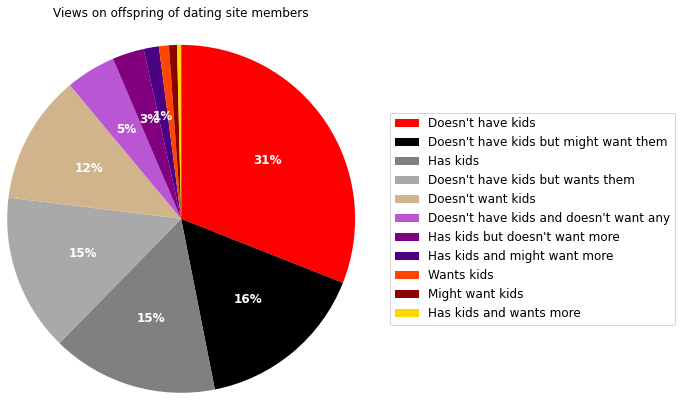

In [331]:
#creating a pie chart - high proportion don't have kids - makes sense as most members are in younger age groups

def my_autopct(pct):
    return ('%.0f%%' % pct) if pct > 1 else ''

colors = ['red', 'black', 'grey','darkgrey', 'tan', 'mediumorchid', 'purple', 'indigo', 'orangered', 'darkred', 'gold']

plt.pie(offspring_grouped['offspring_count'], colors = colors, radius = 2.0, autopct = my_autopct, \
                          counterclock = False, startangle = -270, \
                         textprops = {'color': 'white', 'weight': 'bold', 'fontsize': 12})

#bbox_to_anchor moves the legend around depending on the numbers fed in
plt.legend(labels = offspring_grouped['offspring_group'], bbox_to_anchor = (2.8, 0.5), loc = 'right', fontsize = 12)

#the y = 1.3 shifts the title up above the chart 
plt.title('Views on offspring of dating site members', y = 1.4, fontsize = 12)
plt.savefig('Offspring')

In [332]:
#grouping by orientation
orientation = dating_clean.groupby('orientation').size().sort_values(ascending = False).to_frame().reset_index().rename(\
                                                                                        columns = {0: 'orientation_count'})
orientation

,orientation,orientation_count
0,straight,51603
1,gay,5573
2,bisexual,2767
3,no response given,6


In [333]:
#dropping no response given by the index number as don't want to include this in the chart
orientation = orientation.drop(orientation.index[3])
orientation

,orientation,orientation_count
0,straight,51603
1,gay,5573
2,bisexual,2767


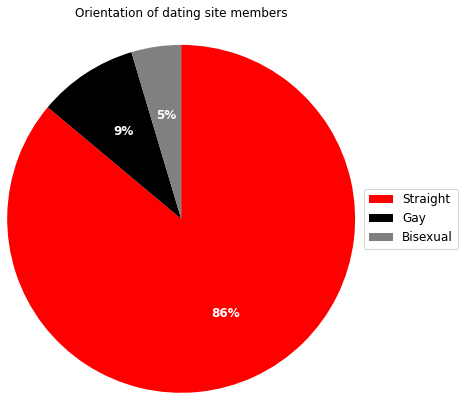

In [334]:
#plotting pie chart
colors = ['red', 'black', 'grey']

plt.pie(orientation['orientation_count'], colors = colors, radius = 2.0, autopct = '%1.0f%%', \
                          counterclock = False, startangle = -270, \
                         textprops = {'color': 'white', 'weight': 'bold', 'fontsize': 12})

#bbox_to_anchor moves the legend around depending on the numbers fed in
plt.legend(labels = ['Straight', 'Gay', 'Bisexual'], bbox_to_anchor = (1.8, 0.5), loc = 'right', fontsize = 12)


#the y = 1.3 shifts the title up above the chart 
plt.title('Orientation of dating site members', y = 1.4, fontsize = 12)
plt.savefig('Orientation', bbox_inches = 'tight')

In [335]:
#grouping by sex
sex = dating_clean.groupby('sex').size().sort_values(ascending = False).to_frame().reset_index().rename(columns = {0: 'sex_count'})
sex

,sex,sex_count
0,m,35826
1,f,24117
2,no response given,6


In [336]:
#dropping no response given
sex = sex.drop(sex.index[2])
sex

,sex,sex_count
0,m,35826
1,f,24117


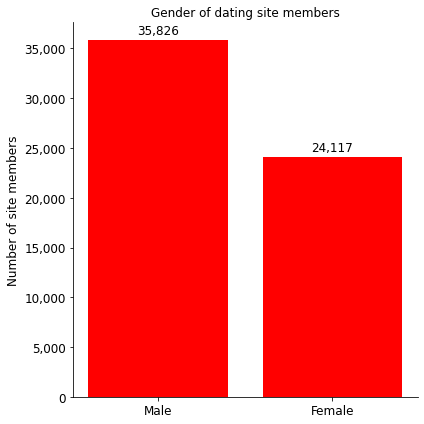

In [337]:
#creating a bar chart
sex_labels = ['Male', 'Female']

plt.figure(figsize = (6, 6))
ax = plt.subplot()
plt.bar(sex_labels, sex['sex_count'], color = 'red')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#adding data labels for bars
bars = plt.bar(sex_labels, sex['sex_count'], color = 'red')

for bar in bars:
    yval = bar.get_height()
    #the '{:,}' command adds a thousand separator to the labels
    ax.annotate('{:,}'.format(yval),
    xy = (bar.get_x() + bar.get_width() / 2, yval),
    #shows label position on x and y axis
    xytext = (0, 3), 
    textcoords = 'offset points', ha = 'center', va = 'bottom', fontsize = 12)

#this code adds a comma separater to the y tick marks
ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))

plt.xlabel('')
plt.xticks(sex_labels, fontsize = 12)
plt.ylabel('Number of site members', fontsize = 12)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.title('Gender of dating site members', fontsize = 12)
plt.tight_layout()
plt.savefig('Sex', bbox_inches = 'tight')

In [338]:
#grouping by smokes
smokes = dating_clean.groupby('smokes').size().sort_values(ascending = False).to_frame().reset_index().rename(columns = 
                                                                                                    ({0: 'count_smokers'}))
smokes

,smokes,count_smokers
0,no,43893
1,no response given,5518
2,sometimes,3787
3,when drinking,3040
4,yes,2231
5,trying to quit,1480


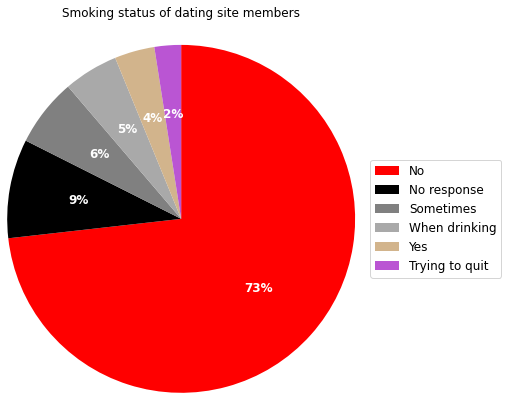

In [339]:
#plotting pie chart
colors = ['red', 'black', 'grey', 'darkgrey', 'tan', 'mediumorchid']

plt.pie(smokes['count_smokers'], colors = colors, radius = 2.0, autopct = '%1.0f%%', \
                          counterclock = False, startangle = -270, \
                           textprops = {'color': 'white', 'weight': 'bold', 'fontsize': 12})

#bbox_to_anchor moves the legend around depending on the numbers fed in
plt.legend(labels = ['No', 'No response', 'Sometimes', 'When drinking', 'Yes', 'Trying to quit'], \
           bbox_to_anchor = (2.0, 0.5), loc = 'right', fontsize = 12)

#the y = 1.3 shifts the title up above the chart 
plt.title('Smoking status of dating site members', y = 1.4, fontsize = 12)
plt.savefig('Smokers', bbox_inches = 'tight')

In [340]:
#grouping by status
status = dating_clean.groupby('status').size().sort_values(ascending = False).to_frame().reset_index().rename(columns = 
                                                                                                    ({0: 'count_status'}))
status

,status,count_status
0,single,55695
1,seeing someone,2064
2,available,1864
3,married,310
4,unknown,10
5,no response given,6


In [341]:
#dropping unknown and no response
status = status.drop(status.index[[4, 5]])
status

,status,count_status
0,single,55695
1,seeing someone,2064
2,available,1864
3,married,310


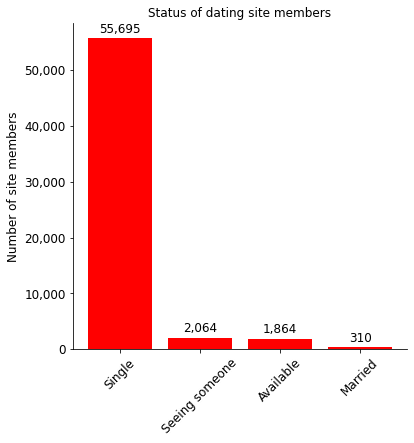

In [342]:
#creating a bar chart
status_labels = ['Single', 'Seeing someone', 'Available', 'Married']

plt.figure(figsize = (6, 6))
ax = plt.subplot()

plt.bar(status_labels, status['count_status'], color = 'red')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#adding data labels for bars
bars = plt.bar(status_labels, status['count_status'], color = 'red')

for bar in bars:
    yval = bar.get_height()
    #the '{:,}' command adds a thousand separator to the labels
    ax.annotate('{:,}'.format(yval),
    xy = (bar.get_x() + bar.get_width() / 2, yval),
    #shows label position on x and y axis
    xytext = (0, 3), 
    textcoords = 'offset points', ha = 'center', va = 'bottom', fontsize = 12)


#this code adds a comma separater to the y tick marks
ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))

plt.xlabel('')
plt.xticks(status_labels, rotation = 45)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.ylabel('Number of site members', fontsize = 12)
plt.title('Status of dating site members', fontsize = 12)
plt.savefig('Status', bbox_inches = 'tight')

In [343]:
#who are the non-single people on the dating site?
not_single = dating_clean[(dating_clean['status'].str.contains('seeing someone') | dating_clean['status'].str.contains\
                                                                                                           ('married'))]
not_single.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
11,28,average,mostly anything,socially,never,graduated from college/university,white,72,40000,banking / financial / real estate,"daly city, california",no response given,straight,likes cats,christianity and very serious about it,m,leo but it doesn't matter,no,"english (fluently), sign language (poorly)",seeing someone
60,31,fit,mostly anything,socially,never,working on college/university,"asian, pacific islander",67,-1,computer / hardware / software,"san francisco, california",no response given,straight,likes dogs and dislikes cats,catholicism,m,gemini but it doesn't matter,no,"english, tagalog (poorly), c++ (okay)",seeing someone
77,25,curvy,no response given,socially,never,working on college/university,white,65,-1,other,"san francisco, california",no response given,bisexual,likes dogs and has cats,agnosticism and laughing about it,f,leo and it&rsquo;s fun to think about,no,english (fluently),seeing someone
114,36,fit,strictly anything,often,sometimes,graduated from ph.d program,white,70,-1,science / tech / engineering,"emeryville, california",no response given,straight,likes dogs and likes cats,agnosticism,m,aries but it doesn't matter,no,"english (fluently), c++ (okay), french (poorly)",seeing someone
119,28,thin,mostly anything,socially,no response given,working on college/university,white,66,-1,student,"berkeley, california",no response given,straight,likes dogs and likes cats,no response given,f,scorpio,no,"english (fluently), polish (fluently), spanish...",seeing someone


In [344]:
#creating a pivot table for chart
attached_pivot = not_single.pivot_table(columns = 'status',
                                       index = 'sex',
                                       aggfunc = 'size')
attached_pivot

status,married,seeing someone
sex,,
f,135,1003
m,175,1061


In [345]:
#sorting the pivot table
attached = attached_pivot.reindex(attached_pivot['married'].sort_values(ascending = False).index)
attached

status,married,seeing someone
sex,,
m,175,1061
f,135,1003


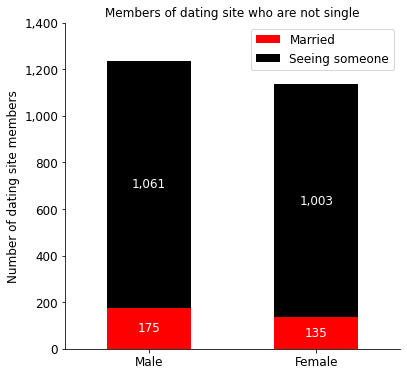

In [346]:
#creating stacked bar chart
x_labels = ['Male', 'Female']

ax = attached.plot.bar(stacked = True, color = ['red', 'black'], figsize = (6, 6))

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# .patches is everything inside of the chart
for bar in ax.patches:
    # Find where everything is located
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = '{:,.0f}'.format(height)
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

# plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12, color = 'white')

#this code adds a comma separater to the y tick marks
ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))

plt.xticks(range(0, len(attached.index)), x_labels, rotation = 360)
plt.xlabel('')
plt.ylim(0, 1400)
plt.ylabel('Number of dating site members', fontsize = 12)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.legend(['Married', 'Seeing someone'], fontsize = 12)
plt.title('Members of dating site who are not single', fontsize = 12)
plt.savefig('attached_members', bbox_inches = 'tight')